<a href="https://colab.research.google.com/github/yishanhsieh/a30-spr2024/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ch 5: Binary Classification**



---


What is regression ?

What is classification ?

---



What is Binary Classification ?

First understand the problem we are trying to solve here:

The 10,000 client for a company problem (refer book)

In [ ]:
import pandas as pd
attrition_past=pd.read_csv('https://bradfordtuckfield.com/attrition_past.csv')

In [ ]:
print(attrition_past.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        abcd                  78               1024                   12   
1        asdf                  14               2145                   20   
2        xyzz                 182               3891                   35   
3        acme                 101              10983                    2   
4        qwer                   0                118                   42   

   exited  
0       1  
1       0  
2       0  
3       1  
4       1  


In [ ]:
# Plotting Attrition Risk
print(attrition_past['exited'].mean())

0.5769230769230769


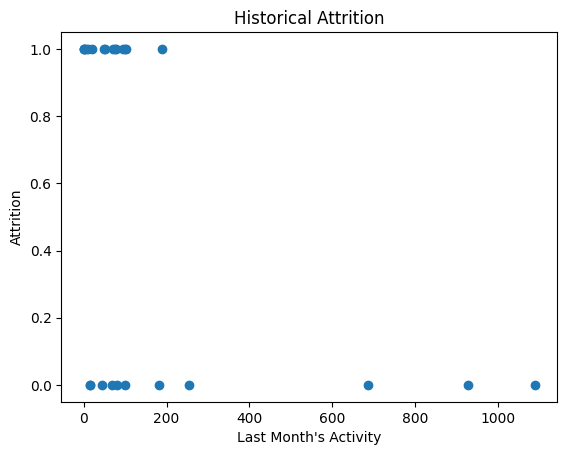

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

In [ ]:
# Confirming Relationships with Linear Regression

x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited'].values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

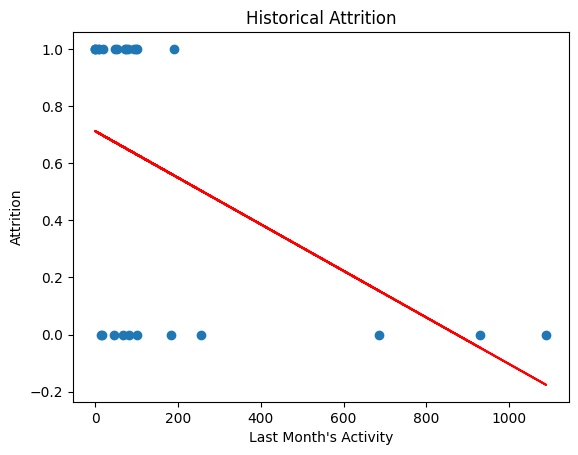

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'])
prediction = [regressor.coef_[0]*x+regressor.intercept_[0] for x in \
list(attrition_past['lastmonth_activity'])]
plt.plot(attrition_past['lastmonth_activity'], prediction, color='red')
plt.title('Historical Attrition')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition')
plt.show()

In [ ]:
attrition_past['predicted']=regressor.predict(x)

In [ ]:
# Predicting the Future on a new dataset using the patterns we learned from the old one

attrition_future=pd.read_csv('http://bradfordtuckfield.com/attrition2.csv')
print(attrition_future.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees
0        hhtn                 166               1393                   91
1        slfm                 824              16920                  288
2        pryr                  68                549                   12
3        ahva                 121               1491                   16
4        dmai                   4                 94                    2


In [ ]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['predicted']=regressor.predict(x)
print(attrition_future.head())

  corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
0        hhtn                 166               1393                   91   
1        slfm                 824              16920                  288   
2        pryr                  68                549                   12   
3        ahva                 121               1491                   16   
4        dmai                   4                 94                    2   

   predicted  
0   0.576641  
1   0.040352  
2   0.656514  
3   0.613317  
4   0.708676  


In [ ]:
#create a list of the top 5 highest-risk clients
print(attrition_future.nlargest(5,'predicted'))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
8         whsh                   0                 40                   52   
12        mike                   0                  0                   49   
24        pian                   0                 12                   19   
21        bass                   2                 19                 1400   
4         dmai                   4                 94                    2   

    predicted  
8    0.711936  
12   0.711936  
24   0.711936  
21   0.710306  
4    0.708676  


In [ ]:
#ranked list of every client from highest to lowest attrition probability
print(list(attrition_future.sort_values(by='predicted',ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']


In [ ]:
#clients whose pre-dicted probabilities are higher than a certain threshold x
print(list(attrition_future.loc[attrition_future['predicted']>0.7,'corporation']))

['dmai', 'whsh', 'oscr', 'kdic', 'mike', 'pevc', 'erin', 'angl', 'bass', 'ynus', 'pian', 'hlpd']


---
After calculating the probablity for the future predictions we also have to make sure how much our predictions are accurate ?

---



In [ ]:
#Measuring Prediction Accuracy
themedian=attrition_past['predicted'].median()
prediction=list(1*(attrition_past['predicted']>themedian))
actual=list(attrition_past['exited'])

from sklearn.metrics import confusion_matrix
print(confusion_matrix(prediction,actual))

[[7 6]
 [4 9]]


What is precision ?

What is recall ?

In [ ]:
conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print(precision, recall)

0.5384615384615384 0.6363636363636364


In [ ]:
# Using Multivariate LPMs
x3 = attrition_past.loc[:,['lastmonth_activity', 'lastyear_activity', 'number_of_employees']].values.reshape(-1,3)
y = attrition_past['exited'].values.reshape(-1,1)
regressor_multi = LinearRegression()
regressor_multi.fit(x3, y)

attrition_future['predicted_multi']=regressor_multi.predict(x3)
print(attrition_future.nlargest(5,'predicted_multi'))

   corporation  lastmonth_activity  lastyear_activity  number_of_employees  \
11        ejdc                  95               1005                   61   
12        mike                   0                  0                   49   
13        pevc                   4                  6                 1686   
4         dmai                   4                 94                    2   
22        ynus                   9                 90                   12   

    predicted  predicted_multi  
11   0.634508         0.870000  
12   0.711936         0.815677  
13   0.708676         0.788110  
4    0.708676         0.755625  
22   0.704600         0.715362  


In [ ]:
print(list(attrition_future.sort_values(by='predicted_multi', ascending=False).loc[:,'corporation']))

['ejdc', 'mike', 'pevc', 'dmai', 'ynus', 'wlcj', 'angl', 'pian', 'slfm', 'hlpd', 'frgv', 'hlly', 'oscr', 'cred', 'dwgt', 'hhtn', 'whsh', 'grce', 'pryr', 'xkcd', 'bass', 'ahva', 'erin', 'zamk', 'skct', 'kdic']


In [ ]:
attrition_future['activity_per_employee']=attrition_future.loc[:,\
'lastmonth_activity']/attrition_future.loc[:,'number_of_employees']

attrition_past['activity_per_employee']=attrition_past.loc[:,\
'lastmonth_activity']/attrition_past.loc[:,'number_of_employees']

x = attrition_past.loc[:,['activity_per_employee','lastmonth_activity',\
'lastyear_activity', 'number_of_employees']].values.reshape(-1,4)

y = attrition_past['exited'].values.reshape(-1,1)

regressor_derived= LinearRegression()

regressor_derived.fit(x, y)

attrition_past['predicted3']=regressor_derived.predict(x)

x = attrition_future.loc[:,['activity_per_employee','lastmonth_activity',\
'lastyear_activity', 'number_of_employees']].values.reshape(-1,4)

attrition_future['predicted3']=regressor_derived.predict(x)

print(list(attrition_future.sort_values(by='predicted3',ascending=False).loc[:,'corporation']))

['pevc', 'bass', 'frgv', 'hlpd', 'angl', 'oscr', 'zamk', 'whsh', 'mike', 'hhtn', 'ejdc', 'grce', 'pian', 'ynus', 'dmai', 'kdic', 'erin', 'slfm', 'dwgt', 'pryr', 'hlly', 'xkcd', 'skct', 'ahva', 'wlcj', 'cred']


In [ ]:
themedian=attrition_past['predicted3'].median()
prediction=list(1*(attrition_past['predicted3']>themedian))
actual=list(attrition_past['exited'])

print(confusion_matrix(prediction,actual))

conf_mat = confusion_matrix(prediction,actual)
precision = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[0][1])
recall = conf_mat[0][0]/(conf_mat[0][0]+conf_mat[1][0])
print(precision, recall)

[[ 9  4]
 [ 2 11]]
0.6923076923076923 0.8181818181818182


In [ ]:
# Why did we shift to Binary classification (Logistic Regression) ?

#### **Predicting Binary Outcomes with Logistic Regression**

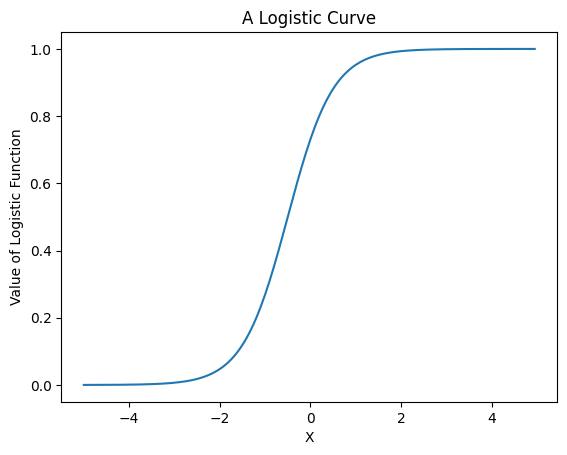

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(-1-2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

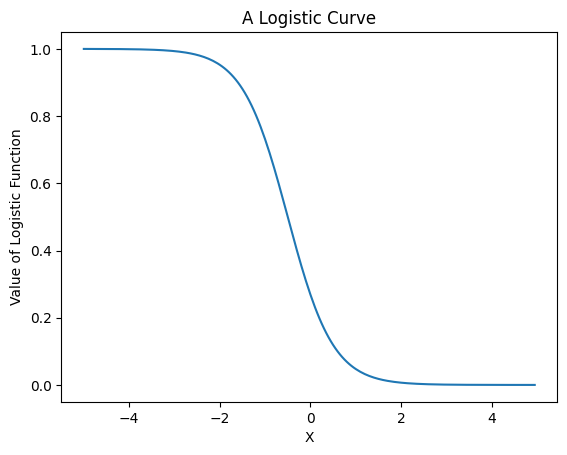

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

x = np.arange(-5, 5, 0.05)
y = (1/(1+np.exp(1+2*x)))
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Value of Logistic Function")
plt.title('A Logistic Curve')
plt.show()

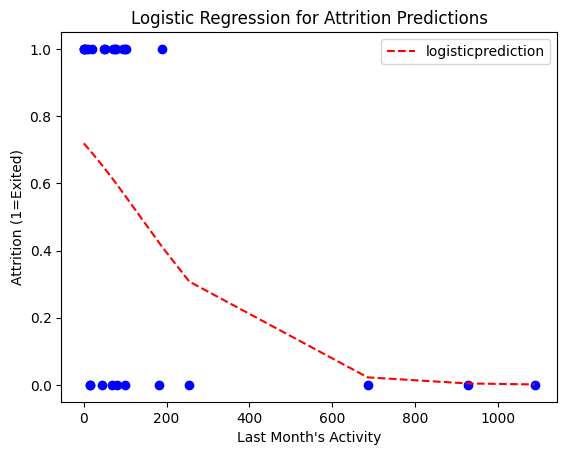

In [ ]:
#Fitting the Logistic Function to Our Data

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)
x = attrition_past['lastmonth_activity'].values.reshape(-1,1)
y = attrition_past['exited']
model.fit(x, y)

attrition_past['logisticprediction']=model.predict_proba(x)[:,1]

fig = plt.scatter(attrition_past['lastmonth_activity'],attrition_past['exited'], color='blue')
attrition_past.sort_values('lastmonth_activity').plot('lastmonth_activity',\
'logisticprediction',ls='--', ax=fig.axes,color='red')

plt.title('Logistic Regression for Attrition Predictions')
plt.xlabel('Last Month\'s Activity')
plt.ylabel('Attrition (1=Exited)')
plt.show()

In [ ]:
x = attrition_future['lastmonth_activity'].values.reshape(-1,1)
attrition_future['logisticprediction']=model.predict_proba(x)[:,1]
print(list(attrition_future.sort_values(by='logisticprediction',\
ascending=False).loc[:,'corporation']))

['whsh', 'pian', 'mike', 'bass', 'pevc', 'dmai', 'ynus', 'kdic', 'hlpd', 'angl', 'erin', 'oscr', 'grce', 'zamk', 'hlly', 'xkcd', 'dwgt', 'pryr', 'skct', 'frgv', 'ejdc', 'ahva', 'wlcj', 'hhtn', 'slfm', 'cred']
